In [1]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt

In [114]:
import importlib

import MyModels
importlib.reload(MyModels)
from MyModels import ImageCNNv1, ImageCNNv2, ImageCNNv3, ImageCNNv4

import MyData
importlib.reload(MyData)
from MyData import load_CelebA

import MyTrainer
importlib.reload(MyTrainer)
from MyTrainer import Trainer

In [95]:
train_dataset, valid_dataset = load_CelebA(train=10000, valid=1000, test=False, random_seed=444)
print(len(train_dataset), len(valid_dataset))

10000 1000


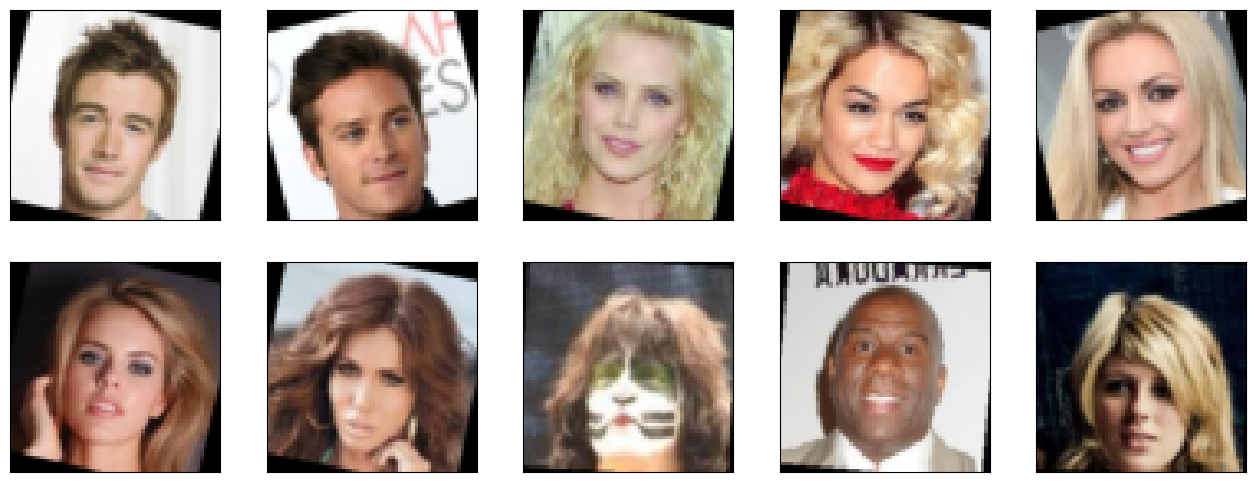

In [109]:
fig = plt.figure(figsize=(16, 6))
for j in range(0, 10):
    img, label = train_dataset[j]
    ax = fig.add_subplot(2, 5, j+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))

plt.show()

In [118]:
from torch.utils.data import DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size, shuffle=False, num_workers=4)

model = ImageCNNv4(3)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, 0.1)
loss_fn = nn.BCELoss()
trainer = Trainer(model, optimizer, loss_fn, train_loader, valid_loader)

In [119]:
train_loss_log, train_acc_log, valid_loss_log, valid_acc_log = trainer.train(epochs=15, scheduler=scheduler, log=True, device=device)

Epoch 1 acc: 0.6539 val_acc: 0.753
Epoch 2 acc: 0.7965 val_acc: 0.573
Epoch 3 acc: 0.8505 val_acc: 0.852
Epoch 4 acc: 0.8710 val_acc: 0.883
Epoch 5 acc: 0.8794 val_acc: 0.874
Epoch 6 acc: 0.8882 val_acc: 0.885
Epoch 7 acc: 0.8910 val_acc: 0.895
Epoch 8 acc: 0.8934 val_acc: 0.874
Epoch 9 acc: 0.8923 val_acc: 0.884
Epoch 10 acc: 0.8977 val_acc: 0.864
Epoch 11 acc: 0.9003 val_acc: 0.889
Epoch 12 acc: 0.9049 val_acc: 0.898
Epoch 13 acc: 0.9052 val_acc: 0.891
Epoch 14 acc: 0.9068 val_acc: 0.899
Epoch 15 acc: 0.9096 val_acc: 0.896


In [100]:
torch.save({
    'model_state_dict': model.state_dict(),
    'train_loss_log': train_loss_log,
    'valid_loss_log': valid_loss_log,
    'train_acc_log': train_acc_log,
    'valid_acc_log': valid_acc_log,
}, '../models/model-v4.pth')

In [101]:
del model, trainer

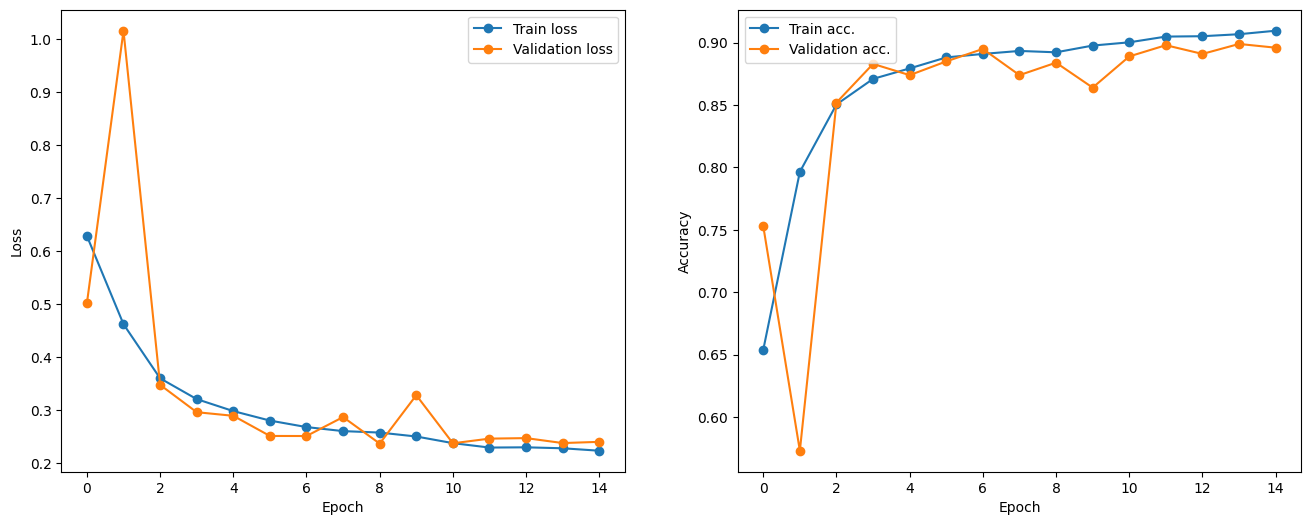

In [120]:
x_arr = range(15)
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, train_loss_log, '-o', label='Train loss')
ax.plot(x_arr, valid_loss_log, '-o', label='Validation loss')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax = fig.add_subplot(1, 2 ,2)
ax.plot(x_arr, train_acc_log, '-o', label='Train acc.')
ax.plot(x_arr, valid_acc_log, '-o', label='Validation acc.')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

plt.show()

In [112]:
checkpoint = torch.load('../models/model-v4.pth')
model_v1 = ImageCNNv4(3)
model_v1.load_state_dict(checkpoint['model_state_dict'])
train_loss_log_v1 = checkpoint['train_loss_log']
valid_loss_log_v1 = checkpoint['valid_loss_log']
train_acc_log_v1 = checkpoint['train_acc_log']
valid_acc_log_v1 = checkpoint['valid_acc_log']

In [33]:
del model_v1

In [113]:
print(train_acc_log_v1[-1], valid_acc_log_v1[-1])

tensor(0.8966) tensor(0.8930)
